In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:xlabel='Car_Name', ylabel='count'>

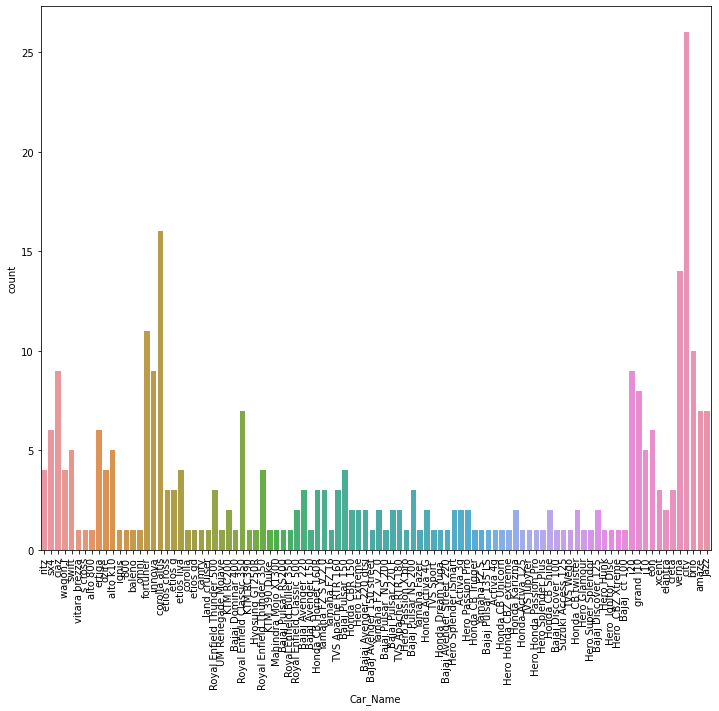

In [7]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.countplot(x=df.Car_Name)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

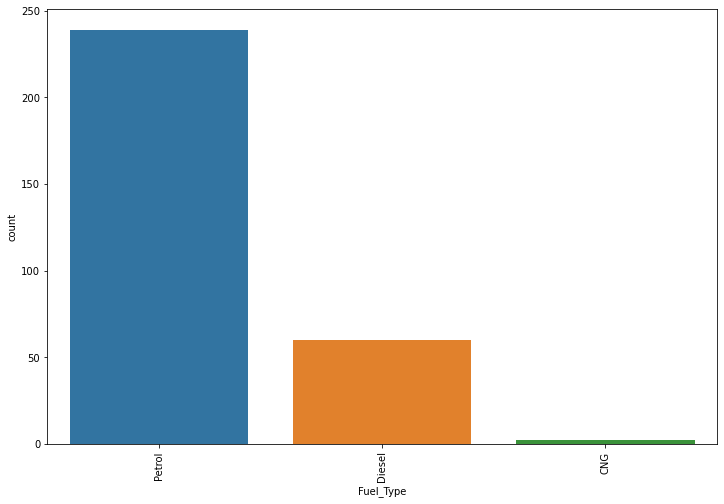

In [8]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x=df.Fuel_Type)

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

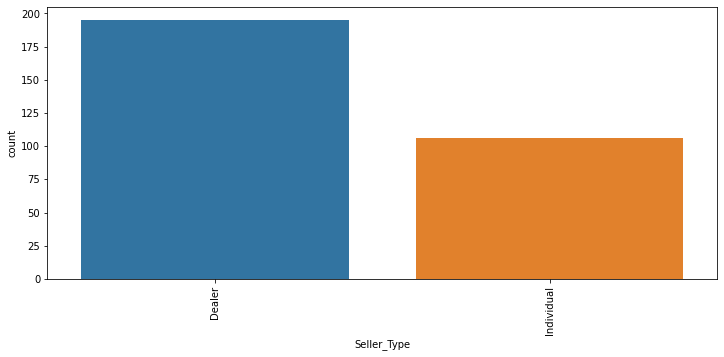

In [9]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x=df.Seller_Type)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

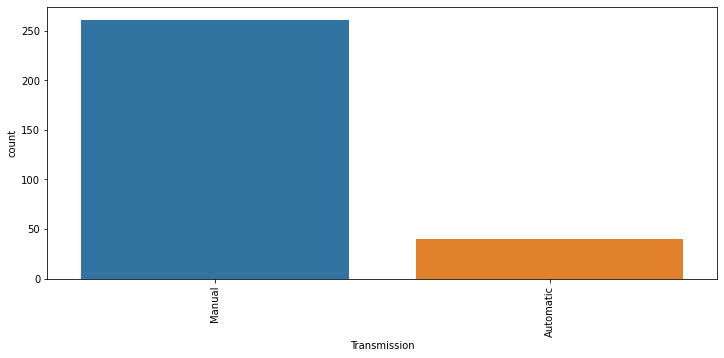

In [10]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x=df.Transmission)

In [11]:
year_grouping = df.groupby("Year").mean()

In [12]:
year_grouping[["Selling_Price"]]

,Selling_Price
Year,
2003,1.300000
2004,1.500000
2005,2.487500
2006,1.437500
2007,0.160000
2008,1.002857
2009,2.816667
2010,5.262667
2011,2.375263


<AxesSubplot:xlabel='Year'>

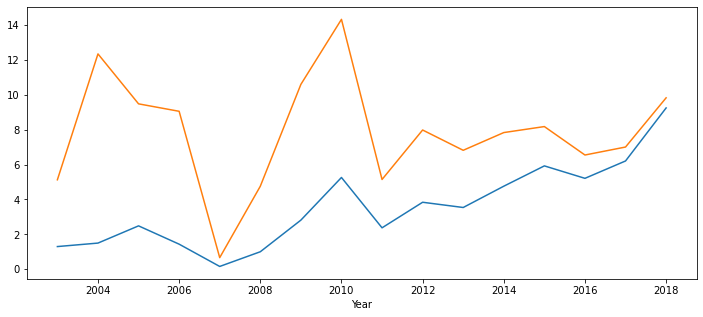

In [13]:
plt.figure(figsize=(12,5))
year_grouping["Selling_Price"].plot(x=df.Year)
year_grouping["Present_Price"].plot(x=df.Year)

In [14]:
nums = ["int64", "float64"]
df_nums = df.select_dtypes(include=nums)
df_nums

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


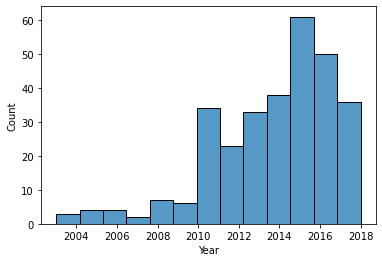

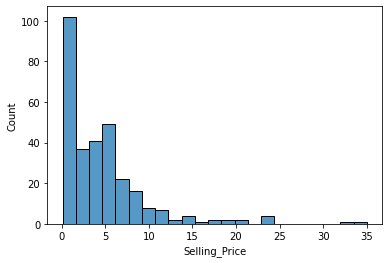

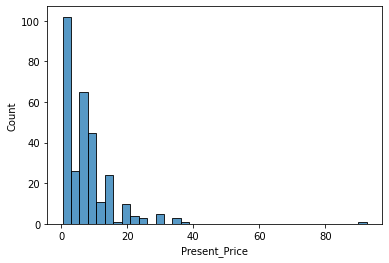

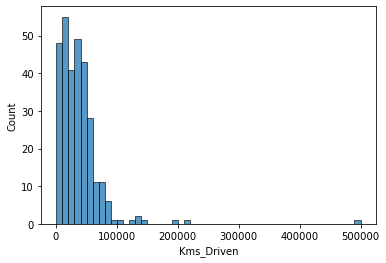

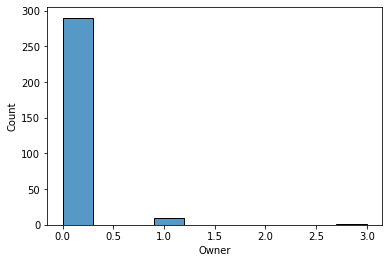

<Figure size 432x288 with 0 Axes>

In [15]:
for i in df_nums.columns:    
    sns.histplot(df[i])
    plt.figure()

In [18]:
df["Owner"] = df["Owner"].astype("object")
df = df.drop("Year", axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.9+ KB


In [20]:
y = df["Selling_Price"]
X = df.drop("Selling_Price", axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
categorical_cols = [i for i in X_train.columns if X_train[i].dtype == "object"]
numerical_cols =  [i for i in X_train.columns if X_train[i].dtype in ['float64', "int64"]]

In [28]:
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])

In [30]:
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['Present_Price', 'Kms_Driven']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Car_Name', 'Fuel_Type', 'Seller_Type',
                                  'Transmission', 'Owner'])])

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [32]:
model_1 = RandomForestRegressor(random_state=42)
model_2 = LinearRegression()
model_3 = DecisionTreeRegressor(random_state=42)

In [34]:
pipe_rfc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model_rfc", model_1)
    ])

pipe_lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model_lr", model_2)
    ])

pipe_dtr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model_lr", model_3)
    ])
pipes = {"RFC":pipe_rfc, "LR":pipe_lr, "DTR ":pipe_dtr}

In [37]:
from sklearn.metrics import r2_score

def score_r2(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return r2_score(y_v, preds)

for i in pipes:    
    r2 = score_r2(pipes[i])
    print(f"{i} R2: {r2} ")

RFC R2: 0.9170208812634246 
LR R2: 0.8164344592807394 
DTR  R2: 0.894785146276498 
